In [1]:
import paddle
from paddle.vision.transforms import Normalize

transform = Normalize(mean=[127.5],
                               std=[127.5],
                               data_format='CHW')
# 使用transform对数据集做归一化
print('download training data and load training data')
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)
print('load finished')

d:\python37\lib\site-packages\urllib3\util\selectors.py:14: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import namedtuple, Mapping
d:\python37\lib\site-packages\urllib3\_collections.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping


download training data and load training data


Cache file C:\Users\huawei\.cache\paddle\dataset\mnist\train-images-idx3-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/train-images-idx3-ubyte.gz 
Begin to download

Download finished
Cache file C:\Users\huawei\.cache\paddle\dataset\mnist\train-labels-idx1-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/train-labels-idx1-ubyte.gz 
Begin to download
........
Download finished
Cache file C:\Users\huawei\.cache\paddle\dataset\mnist\t10k-images-idx3-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/t10k-images-idx3-ubyte.gz 
Begin to download

Download finished
Cache file C:\Users\huawei\.cache\paddle\dataset\mnist\t10k-labels-idx1-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/t10k-labels-idx1-ubyte.gz 
Begin to download
..
Download finished


load finished


d:\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


train_data0 label is: [5]


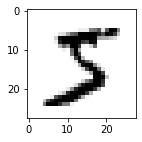

In [2]:
import numpy as np
import matplotlib.pyplot as plt
train_data0, train_label_0 = train_dataset[0][0],train_dataset[0][1]
train_data0 = train_data0.reshape([28,28])
plt.figure(figsize=(2,2))
plt.imshow(train_data0, cmap=plt.cm.binary)
print('train_data0 label is: ' + str(train_label_0))

In [3]:
# 定义多层感知机
class MultilayerPerceptron(paddle.nn.Layer):
    def __init__(self, in_features):
        super(MultilayerPerceptron, self).__init__()
        # 形状变换，将数据形状从 [] 变为 []
        self.flatten = paddle.nn.Flatten()
        # 第一个全连接层
        self.linear1 = paddle.nn.Linear(in_features=in_features, out_features=100)
        # 使用ReLU激活函数
        self.act1 = paddle.nn.ReLU()
        # 第二个全连接层
        self.linear2 = paddle.nn.Linear(in_features=100, out_features=100)
        # 使用ReLU激活函数
        self.act2 = paddle.nn.ReLU()
        # 第三个全连接层
        self.linear3 = paddle.nn.Linear(in_features=100, out_features=10)

    def forward(self, x):
        # x = x.reshape((-1, 1, 28, 28))
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        x = self.linear3(x)
        return x
    # 使用 paddle.Model 封装 MultilayerPerceptron
model = paddle.Model(MultilayerPerceptron(in_features=784))
# 使用 summary 打印模型结构
model.summary((-1, 1, 28, 28))

d:\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Flatten-1      [[1, 1, 28, 28]]         [1, 784]              0       
   Linear-1          [[1, 784]]            [1, 100]           78,500     
    ReLU-1           [[1, 100]]            [1, 100]              0       
   Linear-2          [[1, 100]]            [1, 100]           10,100     
    ReLU-2           [[1, 100]]            [1, 100]              0       
   Linear-3          [[1, 100]]            [1, 10]             1,010     
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
---------------------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.34
Estimated Total Size (MB): 0.35
---------------------------------------------------------------------------



{'total_params': 89610, 'trainable_params': 89610}

In [4]:
# 配置模型
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()),  # 使用Adam算法进行优化
              paddle.nn.CrossEntropyLoss(), # 使用CrossEntropyLoss 计算损失
              paddle.metric.Accuracy()) # 使用Accuracy 计算精度

In [5]:
# 开始模型训练
model.fit(train_dataset, # 设置训练数据集
          epochs=5,      # 设置训练轮数
          batch_size=64, # 设置 batch_size
          verbose=1)     # 设置日志打印格式

The loss value printed in the log is the current step, and the metric is the average value of previous step.
Epoch 1/5


d:\python37\lib\site-packages\paddle\fluid\layers\utils.py:77: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  return (isinstance(seq, collections.Sequence) and


step 938/938 [==============================] - loss: 0.2457 - acc: 0.9000 - 22ms/step           loss: 0.1572 - acc: 0.8974 - ETA: 1s
Epoch 2/5
step 938/938 [==============================] - loss: 0.1213 - acc: 0.9525 - 19ms/step          
Epoch 3/5
step 938/938 [==============================] - loss: 0.0464 - acc: 0.9626 - 19ms/step          
Epoch 4/5
step 938/938 [==============================] - loss: 0.0043 - acc: 0.9693 - 19ms/step          
Epoch 5/5
step 938/938 [==============================] - loss: 0.1345 - acc: 0.9726 - 20ms/step          


In [6]:
model.evaluate(test_dataset, verbose=1)

Eval begin...
The loss value printed in the log is the current batch, and the metric is the average value of previous step.
step 10000/10000 [==============================] - loss: 3.0876e-05 - acc: 0.9695 - 4ms/step          
Eval samples: 10000


{'loss': [3.0875683e-05], 'acc': 0.9695}

In [7]:

results = model.predict(test_dataset)

Predict begin...
step 10000/10000 [==============================] - 4ms/step          
Predict samples: 10000


In [8]:

# 获取概率最大的label
lab = np.argsort(results)                               #argsort函数返回的是result数组值从小到大的索引值
# print(lab)
print("该图片的预测结果的label为: %d" % lab[0][0][-1][0])  #-1代表读取数组中倒数第一列  

该图片的预测结果的label为: 6
